# August

recap day!

## 7th

### (M) 79. Word Search ★★

Typical backtracking - 63 / 22

In [ ]:
class Solution(object):
    def exist(self, board, word):

        ############# dfs definition ###########
        def dfs(idx, i, j):
            if self.res:  #early stop if word is found
              return        

            if idx == k:   #for early stopping
              self.res = True               
              return 

            if (i < 0) or (i >= m) or (j < 0) or (j >= n):
              return 
            
            tmp = board[i][j]
            if tmp != word[idx]:
              return

            board[i][j] = "#"
            for x, y in [[0,-1], [0,1], [1,0], [-1,0]]:
              
                dfs(idx + 1, i+x, j+y)
            board[i][j] = tmp # if backtracking, put back the board element with was marked as visited (= '#')
        ############# dfs definition ###########

        self.res = False
        m = len(board)
        n = len(board[0])
        k = len(word)
        
        for i in range(m):
          for j in range(n):

            if self.res:
              return True     #early stop if word is found

            dfs(0, i, j)

        return self.res

I thought the solution below must work but does not .. why?
(The only difference with the previous one is that I'm passing visited_map as a parameter rather than using backtracking's trait.)

Worries are gone!

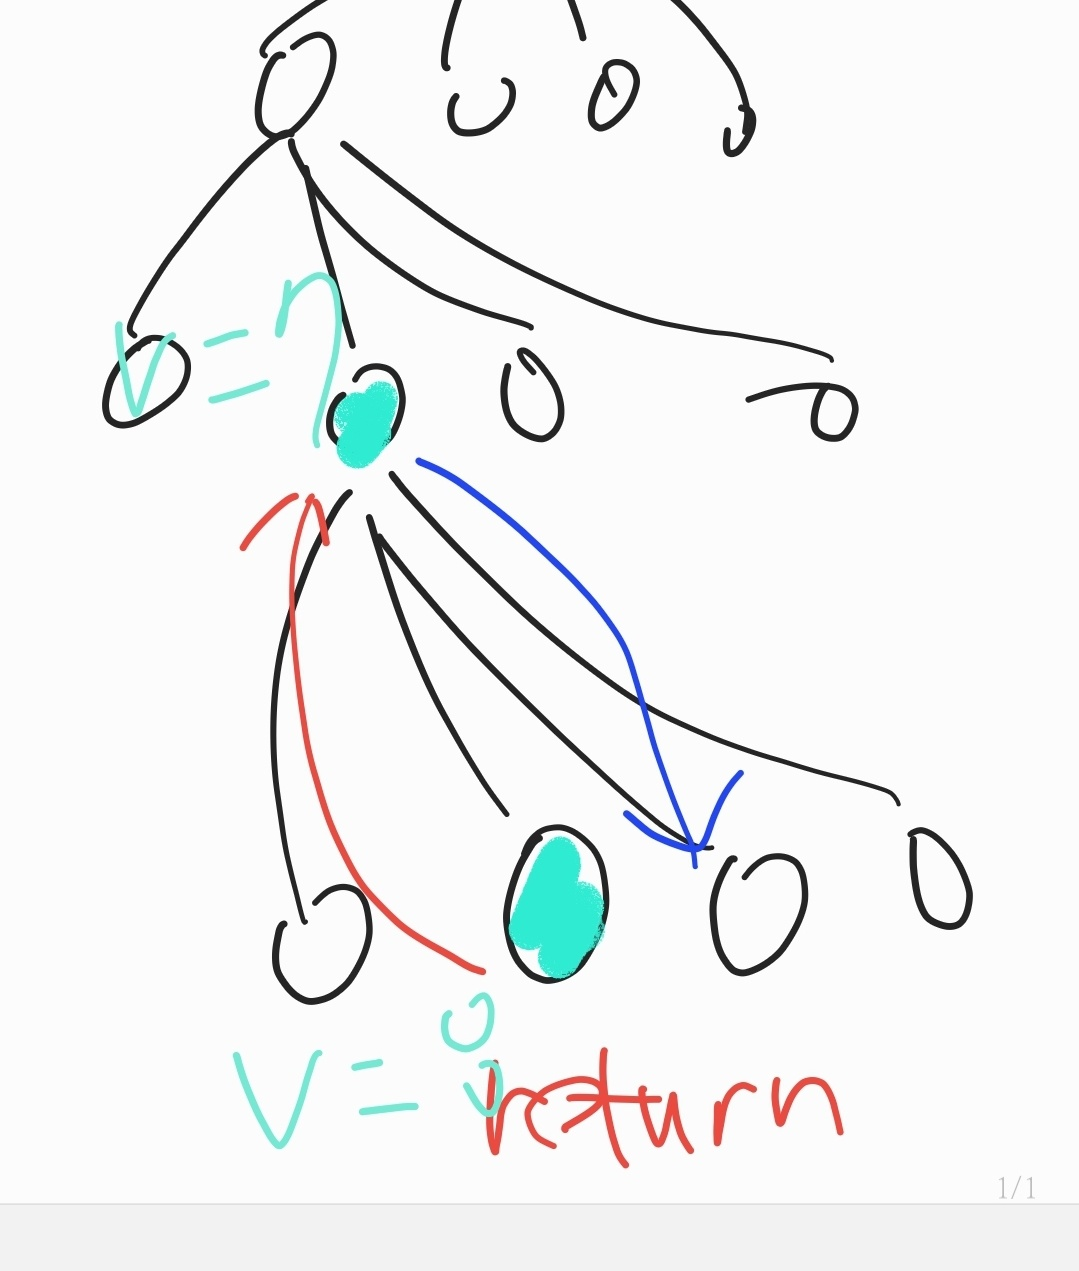

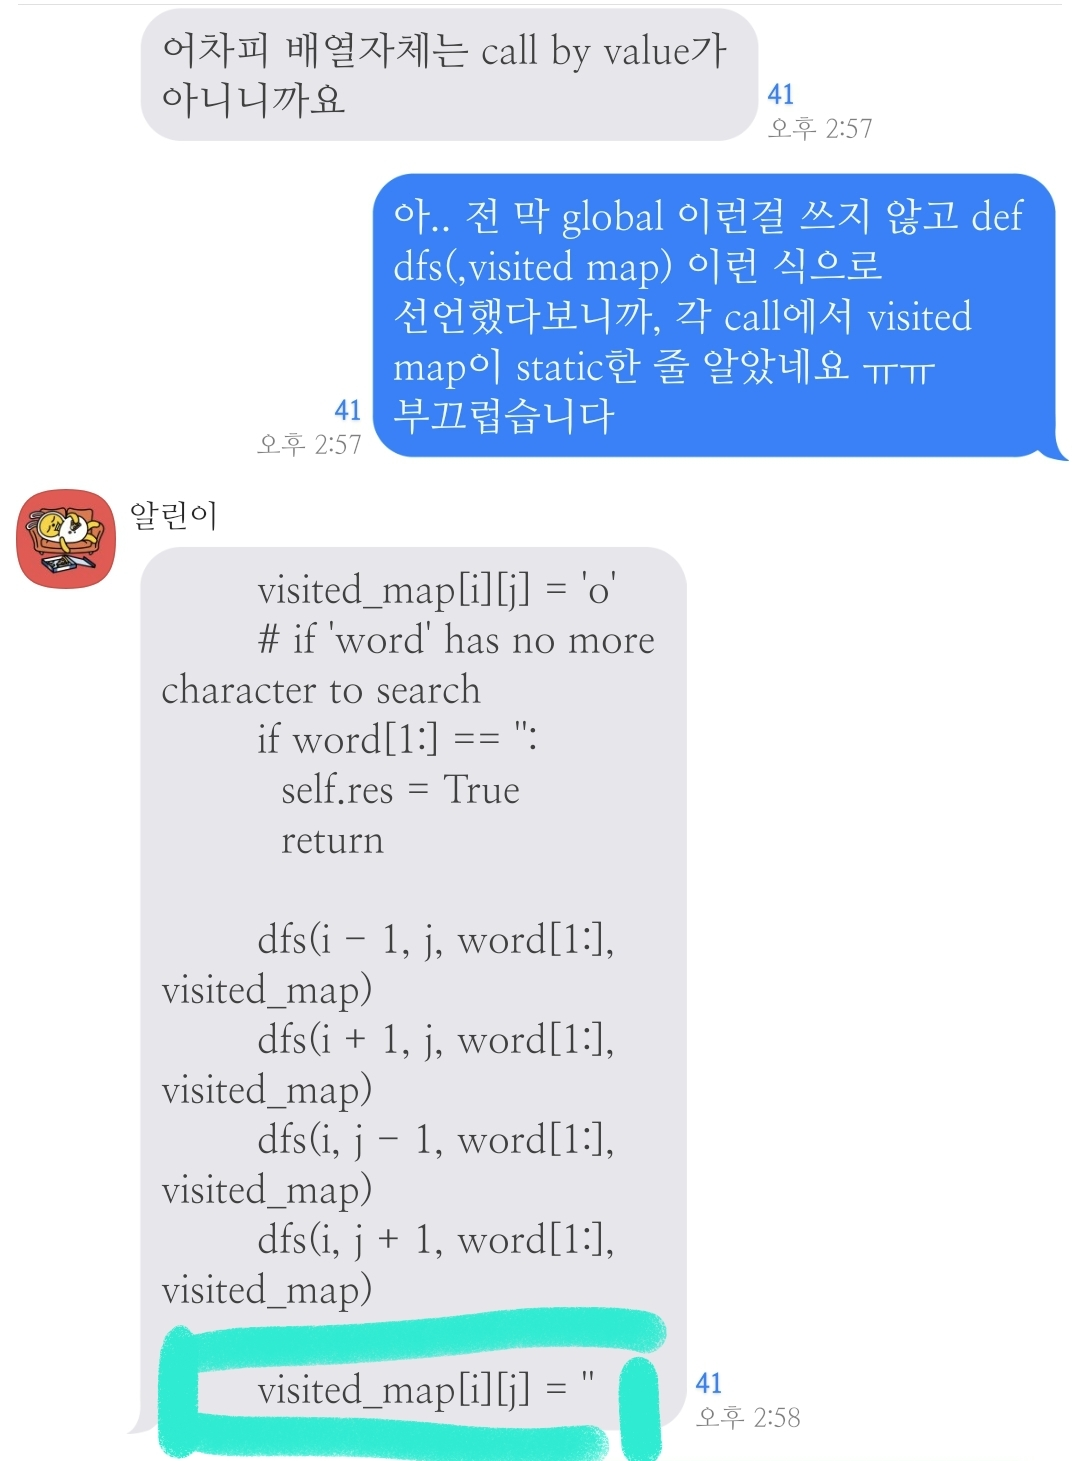

10 / 51 (why this works well in python3 but does not in python?)

In [ ]:
class Solution(object):
    def exist(self, board, word):
      
      ############# dfs definition ###########
      def dfs(i, j, word, visited_map):

        if (i < 0) or (i >= len(board)) or (j < 0) or (j >= len(board[0])) or visited_map[i][j] == 'o' or word[0] != board[i][j] :
          return 

        visited_map[i][j] = 'o'
        # if 'word' has no more character to search
        if word[1:] == '':
          self.res = True
          return

        dfs(i - 1, j, word[1:], visited_map)
        dfs(i + 1, j, word[1:], visited_map)
        dfs(i, j - 1, word[1:], visited_map)
        dfs(i, j + 1, word[1:], visited_map)

        visited_map[i][j] = 'x' # !!!!! Adding this one line makes the whole precess different
      ########################################
  
      m = len(board)
      n = len(board[0])
      self.res = False

      for i in range(m):
        for j in range(n):
          if board[i][j] == word[0]:
            visited_map = [['x' for i in range(n)] for j in range(m)]
            dfs(i, j, word, visited_map)

            if self.res == True:
              return True

      return False        



board = [["A","B","C","E"],["S","F","E","S"],["A","D","E","E"]]
word = "ABCESEEEFS"

#board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
#word = "ABCCED"

#board = [["C","A","A"],["A","A","A"],["B","C","D"]]
#word = "AAB"

Solution().exist(board, word)

False

### (E) 144. Binary Tree Preorder Traversal

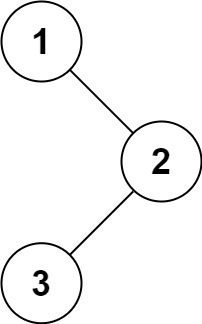

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
root = TreeNode(1)
root.right = TreeNode(2)
root.right.left = TreeNode(3)

Recursive - 77 / 10

In [ ]:
class Solution(object):
    def preorderTraversal(self, root):
        
        if root == None: return None

        ans = []
        def traversal(cursor):
          ans.append(cursor.val)

          if cursor.left != None:
            traversal(cursor.left)
          if cursor.right != None:
            traversal(cursor.right)  
        
        traversal(root)
        return ans

Solution().preorderTraversal(root)

[1, 2, 3]

Iterative - 78 / 48

In [ ]:
class Solution(object):
    def preorderTraversal(self, root):
      
      if root == None: return None

      ans, mystack = [], [root]

      while mystack != []:
        tmp = mystack.pop()
        ans.append(tmp.val)

        if tmp.right != None:
          mystack.append(tmp.right)
        if tmp.left != None:
          mystack.append(tmp.left)

      return ans
Solution().preorderTraversal(root)

[1, 2, 3]

## 8th

### (E) 160. Intersection of Two Linked Lists ★

Follow up: Could you write a solution that runs in O(m + n) time and use only O(1) memory?

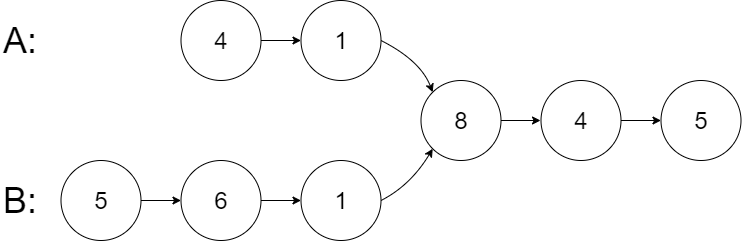
<br>



```python
intersectVal = 8
listA = [4,1,8,4,5]
listB = [5,6,1,8,4,5]
skipA = 2
skipB = 3
```





In [ ]:
class ListNode(object):
    def __init__(self, x):
        self.val = x
        self.next = None

headA = ListNode(4)
headA.next = ListNode(1)
headA.next.next = ListNode(8)
headA.next.next.next = ListNode(4)
headA.next.next.next.next = ListNode(5)


headB = ListNode(5)
headB.next = ListNode(6)
headB.next.next = ListNode(1)
headB.next.next.next = ListNode(8)
headB.next.next.next.next = ListNode(4)
headB.next.next.next.next.next = ListNode(5)

Trash code - 39 / 39

In [ ]:
class Solution(object):
    def getIntersectionNode(self, headA, headB):
        
      listA, cursorA, listB, cursorB = headA, headA, headB, headB
      stackA, stackB = [], []

      while True:
        stackA.append(cursorA)
        if cursorA.next == None:
          break
        cursorA = cursorA.next

      while True:
        stackB.append(cursorB)
        if cursorB.next == None:
          break
        cursorB = cursorB.next

      lenA, lenB = len(stackA), len(stackB)
      
      if min(lenA, lenB) == 1:
        if stackA[lenA - 1] != stackB[lenB - 1]:
            intersectVal = 0
            skipA = lenA
            skipB = lenB
            return None
        else: # if the same
            instersectVal = stackA[lenA - 1].val
            skipA = lenA - 1
            skipB = lenB - 1
            return (stackA[lenA - 1])
        
      for i in range(min(lenA, lenB)):
        
        if stackA[lenA - 1 - i] != stackB[lenB - 1 - i]:

          if (i == 0) :
            intersectVal = 0
            skipA = lenA
            skipB = lenB
            return None

          else:
            instersectVal = stackA[lenA - i].val
            skipA = lenA - i
            skipB = lenB - i
            return (stackA[lenA - i])
        
      if lenA > lenB:
        intersectVal = stackB[0].val
        skipA = lenA - lenB
        skipB = 0
        return stackB[0]
      else:
        intersectVal = stackA[0].val
        skipA = 0
        skipB = lenB - lenA
        return stackA[0]


More generalizability must be attained.
+ meet the follow-up condition

Two pointers

In [ ]:
class Solution(object):
    def getIntersectionNode(self, headA, headB):
        one = headA
        two = headB

        while one != two:
            one = headB if one is None else one.next
            two = headA if two is None else two.next
        return one